# 주제 : 데이터로 알아보는 리그 오브 레전드의 승리 공식
----------

    
## 데이터 소개
    - 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 최종 목표
    - 일상에서 볼 수 있는 데이터의 활용
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = "leehyunmin"
os.environ['KAGGLE_KEY'] = "554531d31173c6ef61b6036ded26d311"

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min

league-of-legends-diamond-ranked-games-10-min.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

with zipfile.ZipFile('league-of-legends-diamond-ranked-games-10-min.zip','r') as zip_ref:
    zip_ref.extractall()

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [7]:
pd.options.display.max_columns = 40

In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [9]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


### 문제 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


<AxesSubplot:>

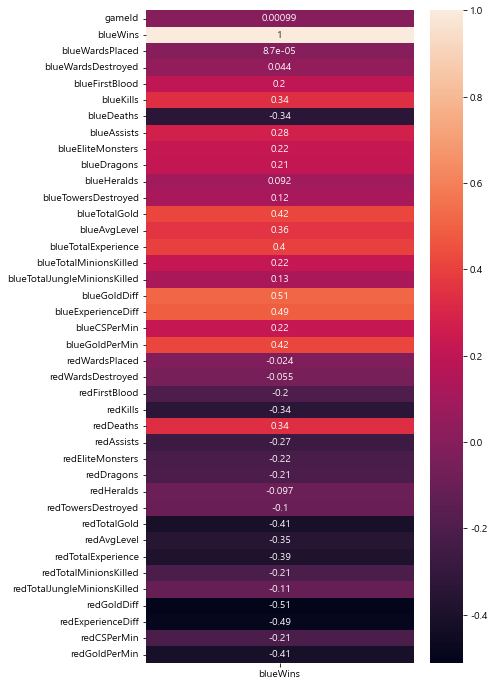

In [10]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기

plt.figure(figsize=(6,12))
sns.heatmap(df.corr()[['blueWins']], annot=True)

### 문제 6. 각 컬럼과 승리 여부의 관계 시각화하기


In [11]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

<AxesSubplot:xlabel='blueGoldDiff', ylabel='Count'>

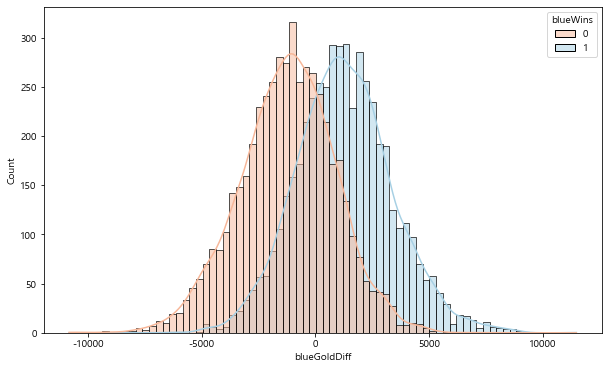

In [12]:
# numerical feature 분석

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='blueGoldDiff', hue='blueWins', palette='RdBu', kde=True)

<AxesSubplot:xlabel='blueKills', ylabel='Count'>

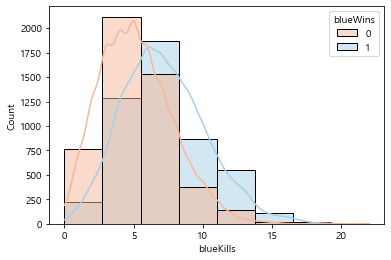

In [13]:
sns.histplot(data=df, x='blueKills', hue='blueWins', palette='RdBu', kde=True, bins=8)

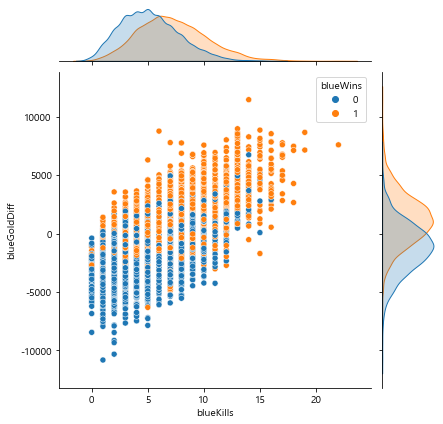

In [14]:
# 상관관계가 많이 높진 않아 두 컬럼 모두 사용해도 좋을 것 같다.

sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins')

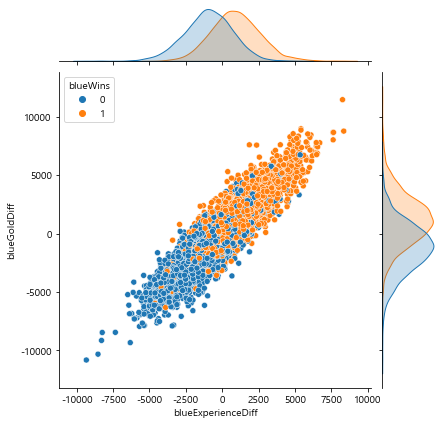

In [15]:
# 상관성이 매우 높다

sns.jointplot(x='blueExperienceDiff', y='blueGoldDiff', data=df, hue='blueWins')

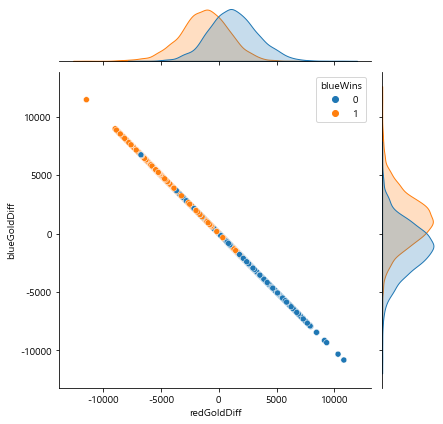

In [16]:
sns.jointplot(x='redGoldDiff', y='blueGoldDiff', data=df, hue='blueWins')

In [17]:
# categorical feature 분석
# 승패와 상관관계가 높은 feature 위주로 확인

<AxesSubplot:xlabel='blueDragons', ylabel='count'>

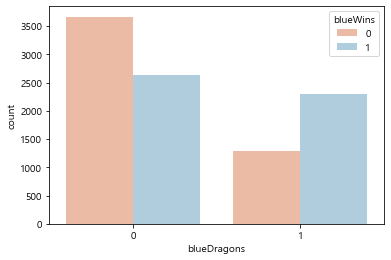

In [18]:
# blue가 드래곤을 잡지 못한 경우가 더 많이 있다. 
# blue가 드래곤을 잡았을 때 승리 횟수가 많다.

sns.countplot(data=df, x='blueDragons', hue='blueWins', palette='RdBu')

<AxesSubplot:xlabel='redDragons', ylabel='count'>

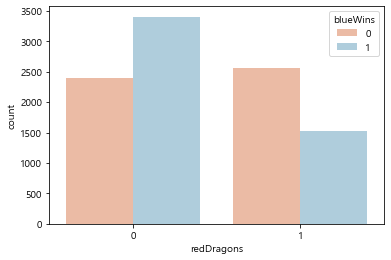

In [19]:
sns.countplot(data=df, x='redDragons', hue='blueWins', palette='RdBu')

<AxesSubplot:xlabel='blueFirstBlood', ylabel='count'>

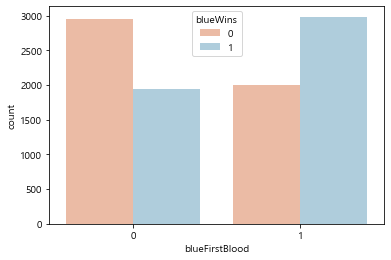

In [20]:
sns.countplot(data=df, x='blueFirstBlood', hue='blueWins', palette='RdBu')

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용해 수치형 데이터 표준화하기


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [23]:
# 상관관계가 높은 column drop
df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths', 
         'redTotalGold', 'redTotalExperience',
         'redGoldDiff', 'redExperienceDiff'], axis=1, inplace=True)

In [24]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [25]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df[['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]
X_cat = df[['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 'redHeralds']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)


X = pd.concat([X_scaled, X_cat], axis=1)
y = df['blueWins']

In [26]:
X

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
0,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,-1.465951,0.256228,0.013342,-0.992782,0.460179,-0.399207,1.532493,0.329496,-0.914893,-0.198353,-0.410475,-0.928741,0.367685,-0.928741,0.052293,1,0,0,0,0
1,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,-0.758722,-1.191254,-0.593342,-1.953558,-1.166792,-0.561751,-0.805870,-1.148188,2.277700,4.412301,-0.410475,1.033784,0.068504,1.033784,0.758619,0,0,0,1,1
2,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,-0.455624,-0.483614,-0.520436,-1.404543,-0.254307,-0.399207,0.129475,1.807181,-0.914893,-0.198353,-0.410475,-0.654900,-2.324944,-0.654900,0.533909,0,1,0,0,0
3,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,-0.718275,0.453671,-0.544350,0.013863,-0.718275,-0.876959,-0.399207,-0.338198,0.822058,-0.914893,-0.198353,0.244627,0.805583,-0.430131,0.805583,-0.007406,0,0,1,0,0
4,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,-0.306513,0.655736,-0.415133,0.137283,-0.306513,-0.067382,-0.290844,-0.338198,0.083215,0.681403,-0.198353,0.244627,0.349182,1.564408,0.349182,0.613731,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,-0.293496,-0.379275,0.271042,-0.728666,-0.404768,0.719503,-0.210439,0.821656,0.930738,0.865408,-0.260762,1.868129,1.020936,1.303263,-0.260762,0.821656,1.280419,0.129475,0.083215,-0.914893,-0.198353,-0.410475,0.531742,-1.726582,0.531742,-0.833801,1,1,0,0,0
9875,1.759976,-1.298863,-0.061087,-0.728666,0.333364,0.719503,-0.210439,-0.172894,0.930738,1.105315,0.745765,-0.253559,0.312888,0.479942,0.745765,-0.172894,-0.561751,8.547582,-0.901908,-0.914893,-0.198353,0.244627,-0.517980,0.467412,-0.517980,-0.692938,0,1,0,0,0
9876,0.039499,-0.839069,-0.061087,0.293944,-0.404768,-0.879231,-0.210439,-0.391082,0.275280,0.086541,-0.306513,-0.556657,-0.990702,-0.959957,-0.306513,-0.391082,-0.453388,-1.273543,1.068338,0.681403,-0.198353,1.554831,1.992226,0.866319,1.992226,1.227490,0,0,0,1,0
9877,-0.459994,0.540312,-1.389604,-1.069536,-0.896856,0.719503,-0.210439,-1.331573,-1.035635,-0.582367,0.334004,-0.253559,-0.347874,-0.547516,0.334004,-1.331573,2.364049,0.597148,-1.394469,-0.914893,-0.198353,0.899729,1.353264,-1.128220,1.353264,-0.798921,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6915, 31) (2964, 31) (6915,) (2964,)


## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### 문제 10. 모델 학습 결과 평가하기


In [31]:
from sklearn.metrics import classification_report

In [32]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



### 문제 11. XGBoost 모델 생성/학습하기


In [33]:
from xgboost import XGBClassifier

C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [34]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[15:38:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 문제 12. 모델 학습 결과 평가하기


In [38]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1469
           1       0.72      0.73      0.73      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## Step5 모델 학습 결과 심화 분석하기


### 문제 13. Logistic Regression 모델 계수로 상관성 파악하기

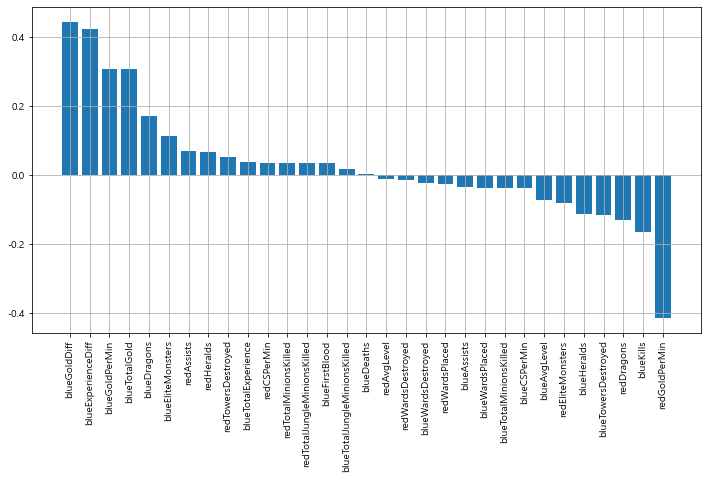

In [44]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=['Model Coefficient'])
model_coef.sort_values(by='Model Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
plt.bar(model_coef.index, model_coef['Model Coefficient'])
plt.grid()
plt.xticks(rotation=90)
plt.show()

### 문제 14. XGBoost 모델로 특징의 중요도 확인하기

<BarContainer object of 31 artists>

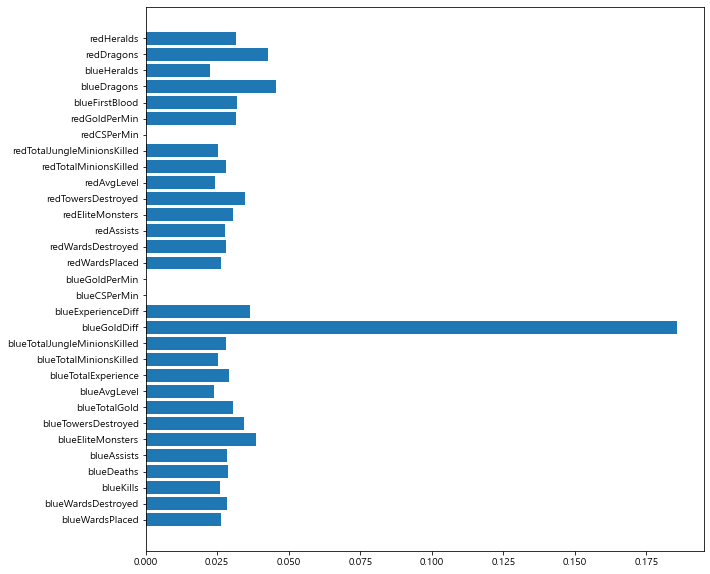

In [45]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
plt.figure(figsize=(10,10))
plt.barh(X.columns, model_xgb.feature_importances_)

